In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df=pd.read_csv('gene_expression.csv')

In [125]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

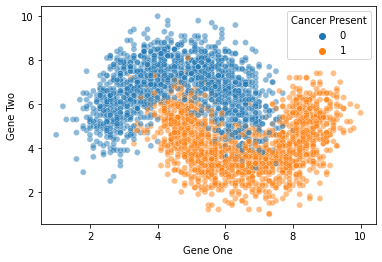

In [126]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
               alpha=0.5)

(4.0, 8.0)

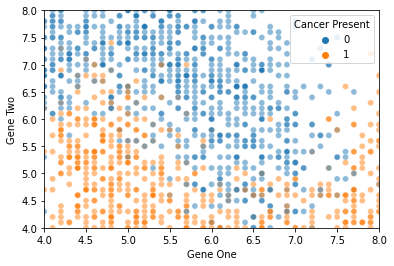

In [127]:
#zooming
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
               alpha=0.5,style_order='Cancer Present')
plt.xlim(4,8)
plt.ylim(4,8)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

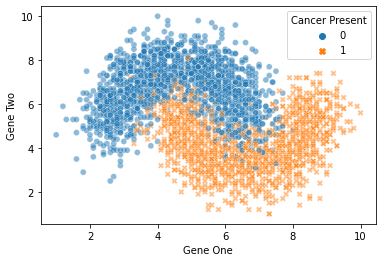

In [128]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
               alpha=0.5,style='Cancer Present')

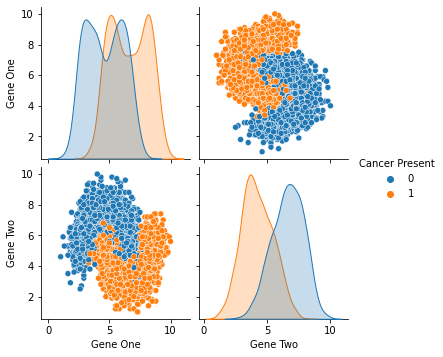

In [129]:
sns.pairplot(data=df,hue='Cancer Present')

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
X=df.drop('Cancer Present',axis=1)

In [133]:
y=df['Cancer Present']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
scaler=StandardScaler()

In [136]:
scaled_X_train=scaler.fit_transform(X_train)

In [137]:
scaled_X_test=scaler.transform(X_test)

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
#help(KNeighborsClassifier)

In [140]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [141]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [142]:
y_pred=knn_model.predict(scaled_X_test)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [146]:
#Choosing right K Value

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
test_error_rates=[]

for k in range(1,30):
    
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test=knn_model.predict(scaled_X_test)
    
    test_error=1-accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

In [149]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

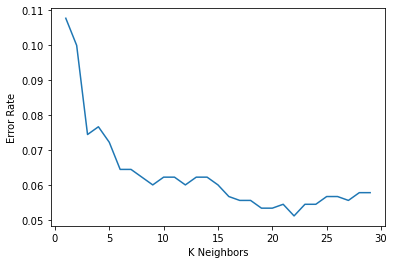

In [150]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [151]:
scaler=StandardScaler()

In [152]:
knn=KNeighborsClassifier()

In [153]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [154]:
operations=[('scaler',scaler),('knn',knn)]

In [155]:
from sklearn.pipeline import Pipeline

In [156]:
pipe=Pipeline(operations)

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
k_values=list(range(1,20))

In [159]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [160]:
param_grid={'knn__n_neighbors':k_values}

In [161]:
full_cv_classifier = GridSearchCV(pipe,param_grid=param_grid,cv=5,
                                  scoring='accuracy')

In [162]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [163]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [164]:
full_pred=full_cv_classifier.predict(X_test)

In [165]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [166]:
new_patient=[[3.8,6.4]]

In [167]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [168]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])

In [169]:
#Practice

In [170]:
df=pd.read_csv('gene_expression.csv')

In [171]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

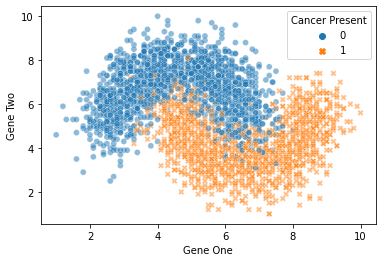

In [172]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
               style='Cancer Present',alpha=0.5)

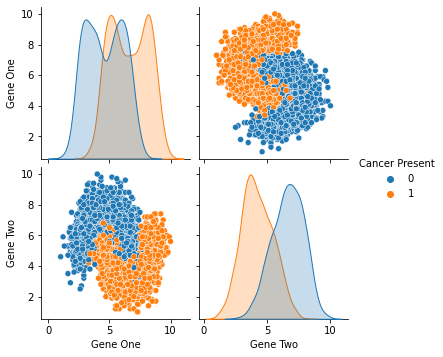

In [173]:
sns.pairplot(data=df,hue='Cancer Present')

In [174]:
X=df.drop('Cancer Present',axis=1)

In [175]:
y=df['Cancer Present']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler=StandardScaler()

In [180]:
scaled_X_train=scaler.fit_transform(X_train)

In [181]:
scaled_X_test=scaler.transform(X_test)

In [182]:
#Lets create simple model with k value = 1

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [185]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [186]:
y_pred=knn_model.predict(scaled_X_test)

In [187]:
#knn_model.predict_proba(scaled_X_test)

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [189]:
accuracy_score(y_test,y_pred)

0.92

In [190]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 31, 446]], dtype=int64)

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.94      0.93       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [192]:
#Lets find the K value using Elbow method

In [193]:
errors=[]

for k in range(1,31):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(scaled_X_train,y_train)
    y_pred=knn_model.predict(scaled_X_test)
    
    error_test=1-accuracy_score(y_test,y_pred)
    
    errors.append(error_test)

In [194]:
errors

[0.07999999999999996,
 0.0855555555555556,
 0.06666666666666665,
 0.06666666666666665,
 0.06777777777777783,
 0.06000000000000005,
 0.06555555555555559,
 0.061111111111111116,
 0.06555555555555559,
 0.06222222222222218,
 0.06666666666666665,
 0.06333333333333335,
 0.06555555555555559,
 0.06444444444444442,
 0.06666666666666665,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06444444444444442,
 0.06222222222222218,
 0.06666666666666665,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218]

Text(0, 0.5, 'Errors')

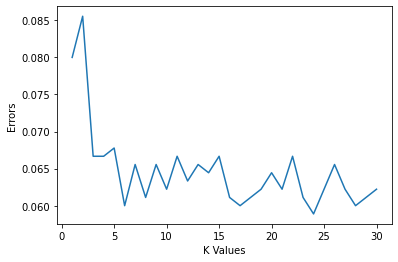

In [195]:
plt.plot(range(1,31),errors)
plt.xlabel('K Values')
plt.ylabel('Errors')

In [196]:
# here K-value 6 can be right choice 

In [197]:
#lets find the right K value with GridSearch cross validation and Pipeline

In [198]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [200]:
scaler=StandardScaler()

In [201]:
knn=KNeighborsClassifier()

In [202]:
operations=[('scaler',scaler),('knn',knn)]

In [203]:
from sklearn.pipeline import Pipeline

In [204]:
pipe=Pipeline(operations)

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
k_values=list(range(1,50))

In [207]:
param_grid={'knn__n_neighbors':k_values,'knn__metric':['euclidean','manhattan','minkowski']}

In [208]:
grid_model=GridSearchCV(pipe, param_grid=param_grid,cv=25,scoring='accuracy')

In [209]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=25,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [210]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=23))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=23),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 23,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [211]:
grid_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 23}

In [212]:
y_pred=grid_model.predict(X_test)

In [213]:
accuracy_score(y_test,y_pred)

0.9388888888888889

In [214]:
confusion_matrix(y_test,y_pred)

array([[392,  31],
       [ 24, 453]], dtype=int64)

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [218]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<AxesSubplot:>

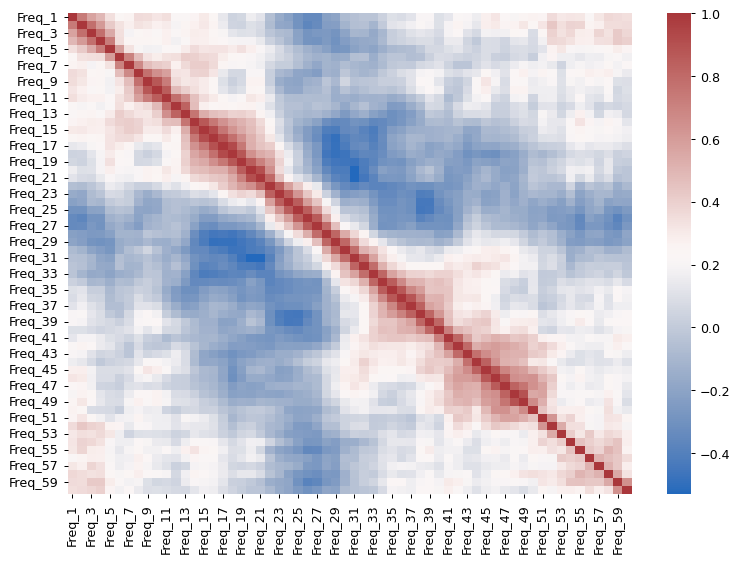

In [219]:
plt.figure(figsize=(10,7),dpi=91)
sns.heatmap(data=df.corr(),cmap='vlag')

In [ ]:
#Expected Output

<AxesSubplot:>

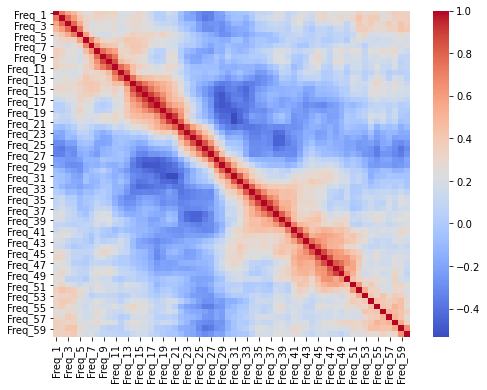

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [220]:
df['Target']=df['Label'].map({'R':0,'M':1})

In [221]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [101]:
#Expected Output

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [222]:
X=df.drop(['Label','Target'],axis=1)
y=df['Label']

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [225]:
from sklearn.pipeline import Pipeline

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler=StandardScaler()

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knn=KNeighborsClassifier()

In [230]:
operations=[('scaler',scaler),('knn',knn)]

In [231]:
pipe=Pipeline(operations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
k_values=list(range(1,30))

In [255]:
param_grid={'knn__n_neighbors':k_values}

In [256]:
grid_model=GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy')

In [257]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
#Expected Output

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [258]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
#Expected Output

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [261]:
mean_test_scores=grid_model.cv_results_['mean_test_score']

In [262]:
mean_test_scores

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

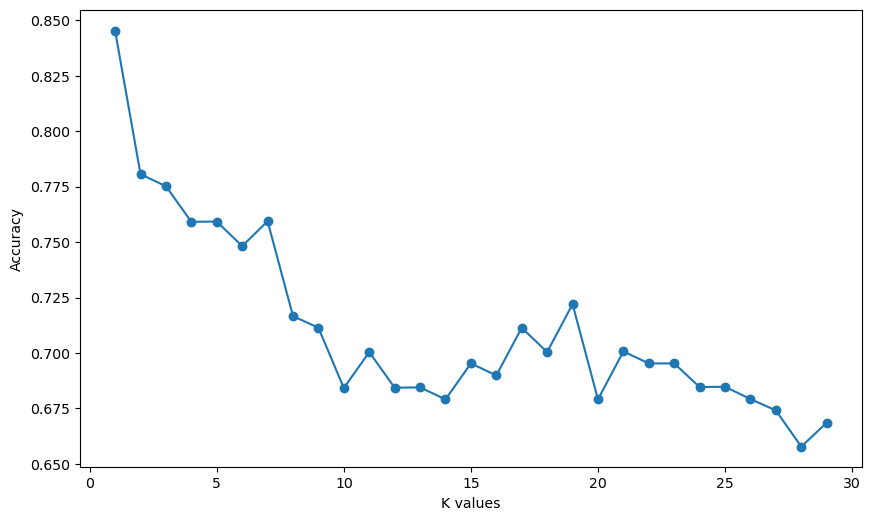

In [263]:
plt.figure(figsize=(10,6),dpi=101)
plt.plot(range(1,30),mean_test_scores,marker='o')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [113]:
#Expected Output

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

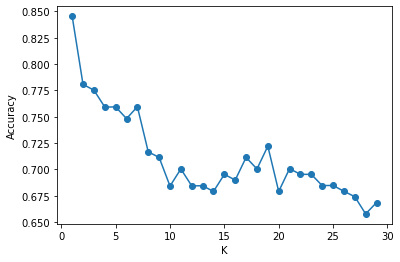

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [264]:
y_pred=grid_model.predict(X_test)

In [265]:
from sklearn.metrics import confusion_matrix,classification_report

In [266]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [117]:
#Expected Output

array([[12,  1],
       [ 1,  7]], dtype=int64)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!